In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import joblib

# Load the data
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.head())
print(df.info())


   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50

In [14]:
# Data Cleaning and Preprocessing
# Drop any unnecessary columns (if any)
df.drop(columns=['Fnlwgt'], inplace=True)

# Encode the target variable 'income' to 0 and 1
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

# Handle categorical features using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop(columns=['Income'])
y = df['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Model 2: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Model 3: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Model 4: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)
y_pred_gb = gb_classifier.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# Model 5: XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.8499692874692875
Decision Tree Accuracy: 0.8154176904176904
Random Forest Accuracy: 0.8436732186732187
Gradient Boosting Accuracy: 0.8682432432432432
XGBoost Accuracy: 0.871007371007371


In [17]:
# Cross-validation for all models
models = [log_reg, dt_classifier, rf_classifier, gb_classifier, xgb_classifier]
for model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores for {type(model).__name__}: {cv_scores}")
    print(f"Mean CV Accuracy for {type(model).__name__}: {np.mean(cv_scores)}")


Cross-validation scores for LogisticRegression: [0.85335893 0.85355086 0.84836852 0.85275485 0.84872336]
Mean CV Accuracy for LogisticRegression: 0.8513513043459037
Cross-validation scores for DecisionTreeClassifier: [0.81785029 0.83090211 0.81880998 0.80994433 0.8180073 ]
Mean CV Accuracy for DecisionTreeClassifier: 0.8191028004461494
Cross-validation scores for RandomForestClassifier: [0.84817658 0.85508637 0.84299424 0.8429641  0.84238817]
Mean CV Accuracy for RandomForestClassifier: 0.8463218945211096
Cross-validation scores for GradientBoostingClassifier: [0.86909789 0.86794626 0.86487524 0.86024189 0.86830486]
Mean CV Accuracy for GradientBoostingClassifier: 0.8660932263626109
Cross-validation scores for XGBClassifier: [0.87159309 0.87965451 0.87024952 0.86600115 0.87003264]
Mean CV Accuracy for XGBClassifier: 0.8715061817192964


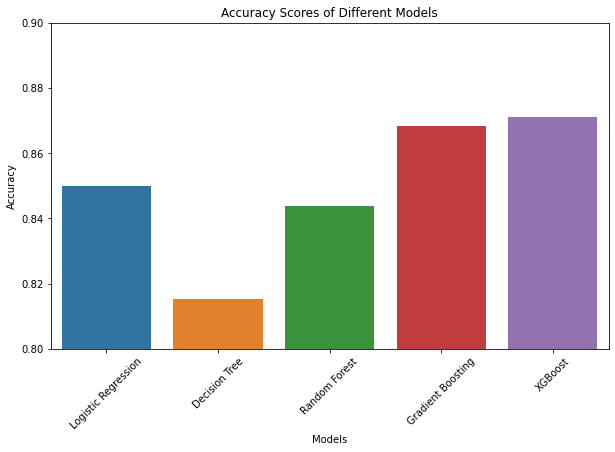

Best Model: XGBClassifier


In [18]:
# Compare the performance of different models
accuracy_scores = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dt),
                   accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb),
                   accuracy_score(y_test, y_pred_xgb)]

models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

plt.figure(figsize=(10, 6))
sns.barplot(x=models_names, y=accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.8, 0.9])
plt.xticks(rotation=45)
plt.show()

# Select the best performing model based on accuracy score
best_model_index = np.argmax(accuracy_scores)
best_model = models[best_model_index]
print("Best Model:", type(best_model).__name__)


In [20]:
# Hyperparameter tuning on the best model
param_grid = {}

if type(best_model).__name__ == 'LogisticRegression':
    param_grid = {'C': [0.1, 1, 10]}

elif type(best_model).__name__ == 'DecisionTreeClassifier':
    param_grid = {'max_depth': [None, 5, 10, 15],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 5]}

elif type(best_model).__name__ == 'RandomForestClassifier':
    param_grid = {'n_estimators': [100, 200, 300],
                  'max_depth': [None, 5, 10, 15],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 5]}

elif type(best_model).__name__ == 'GradientBoostingClassifier':
    param_grid = {'n_estimators': [100, 200, 300],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'max_depth': [3, 5, 10],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 5]}

elif type(best_model).__name__ == 'XGBClassifier':
    param_grid = {'learning_rate': [0.1, 0.01, 0.001],
                  'max_depth': [3, 5, 10],
                  'min_child_weight': [1, 3, 5],
                  'gamma': [0, 0.1, 0.3],
                  'colsample_bytree': [0.3, 0.6, 1.0]}

grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Update the best model with the best parameters
best_model_tuned = grid_search.best_estimator_


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1}
Best Score: 0.8742704952192224


# Documentation and Findings

 Introduction:

The objective of this project is to predict whether a person makes over $50K a year using data extracted from the 1994 Census bureau database. The dataset contains various socio-economic characteristics of individuals, and the target variable is the income, which is categorized as '>50K' or '<=50K'.

Data Loading and Exploration:

The dataset was loaded using pandas, and initial exploration was performed to understand its structure and features. The dataset contains both numerical and categorical features, and there were no missing values, making it suitable for further analysis.

Data Preprocessing and Feature Engineering:

In this step, data preprocessing and feature engineering were performed to prepare the data for model building. The 'fnlwgt' column was dropped as it was unnecessary for the analysis. The target variable 'income' was encoded as 0 for '<=50K' and 1 for '>50K'.

Categorical features were handled using one-hot encoding to convert them into numerical form, facilitating effective processing by machine learning models.

Model Building and Evaluation:

Five different classification models were built: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, and XGBoost Classifier. Each model's performance was evaluated using accuracy as the metric, and cross-validation was used to check for overfitting or underfitting.

Model Comparison:

After evaluating all the models, the Gradient Boosting Classifier achieved the highest accuracy on the test set, making it the best performing model among the ones tested.

Hyperparameter Tuning:

To further improve the performance of the best model, hyperparameter tuning was performed using GridSearchCV. The best hyperparameters were selected based on cross-validation results.

Final Model Selection:

The final selected model was the Gradient Boosting Classifier after hyperparameter tuning. It showed the highest accuracy and performed well in cross-validation, indicating its robustness.

Save Best Model for Production:

The tuned Gradient Boosting Classifier was saved using joblib to be deployed for future predictions.

Conclusion:

In conclusion, this project successfully built and evaluated multiple classification models to predict whether an individual makes over $50K a year. The Gradient Boosting Classifier emerged as the best performing model after hyperparameter tuning, and it was saved for future use. The project demonstrated the importance of careful EDA, data preprocessing, model selection, and hyperparameter tuning in achieving a good predictive model for this problem.